# Connecting to Kaggle

Getting Kaggle Api from Account

In [ ]:
! pip install -q kaggle

In [ ]:
# Upload downloaded .json file
from google.colab import files

files.upload()

Saving kaggle.json to kaggle (9).json


{'kaggle.json': b'{"username":"archiestudent","key":"819b95fae3a6324c1882968b2ecc2819"}'}

In [ ]:
! mkdir ~/.kaggle 
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
# Check if there is connection
! kaggle datasets list

ref                                                            title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
iamsouravbanerjee/world-population-dataset                     World Population Dataset                             17KB  2022-08-31 11:20:04           7125        223  1.0              
kaggleashwin/population-dataset                                World Population by Countries Dataset (1960-2021)    69KB  2022-08-31 05:30:26           1753         74  1.0              
iamsouravbanerjee/house-rent-prediction-dataset                House Rent Prediction Dataset                        82KB  2022-08-20 13:49:03          12876        323  1.0              
pantanjali/unemployment-dataset                                Un

In [ ]:
! kaggle datasets download deepcontractor/smoke-detection-dataset

smoke-detection-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
! mkdir smoke
! unzip smoke-detection-dataset.zip -d smoke

mkdir: cannot create directory ‘smoke’: File exists
Archive:  smoke-detection-dataset.zip
replace smoke/smoke_detection_iot.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


**Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt

#machlearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
import graphviz
from IPython.display import Image, display
import pydotplus

from sklearn.preprocessing import StandardScaler

**Loading the data**

In [ ]:
smoke = pd.read_csv("/content/smoke/smoke_detection_iot.csv")

In [ ]:
smoke.head()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


**Cleaning the data**

Truncating Irrelevant Features 
The "unnamed"

In [ ]:
smoke = smoke.drop(['Unnamed: 0'],axis=1)
smoke.head()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


Missing Value

In [ ]:
smoke.isnull().sum()

UTC               0
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
Fire Alarm        0
dtype: int64

Duplicate removal

In [ ]:
smoke = smoke.drop_duplicates(keep='first')

**Data Exploration**

In [ ]:
smoke.shape

(62630, 15)

In [ ]:
smoke.columns

Index(['UTC', 'Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]',
       'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5',
       'NC1.0', 'NC2.5', 'CNT', 'Fire Alarm'],
      dtype='object')

In [ ]:
smoke.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62630 entries, 0 to 62629
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UTC             62630 non-null  int64  
 1   Temperature[C]  62630 non-null  float64
 2   Humidity[%]     62630 non-null  float64
 3   TVOC[ppb]       62630 non-null  int64  
 4   eCO2[ppm]       62630 non-null  int64  
 5   Raw H2          62630 non-null  int64  
 6   Raw Ethanol     62630 non-null  int64  
 7   Pressure[hPa]   62630 non-null  float64
 8   PM1.0           62630 non-null  float64
 9   PM2.5           62630 non-null  float64
 10  NC0.5           62630 non-null  float64
 11  NC1.0           62630 non-null  float64
 12  NC2.5           62630 non-null  float64
 13  CNT             62630 non-null  int64  
 14  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(7)
memory usage: 7.6 MB


Test the distribution of each features

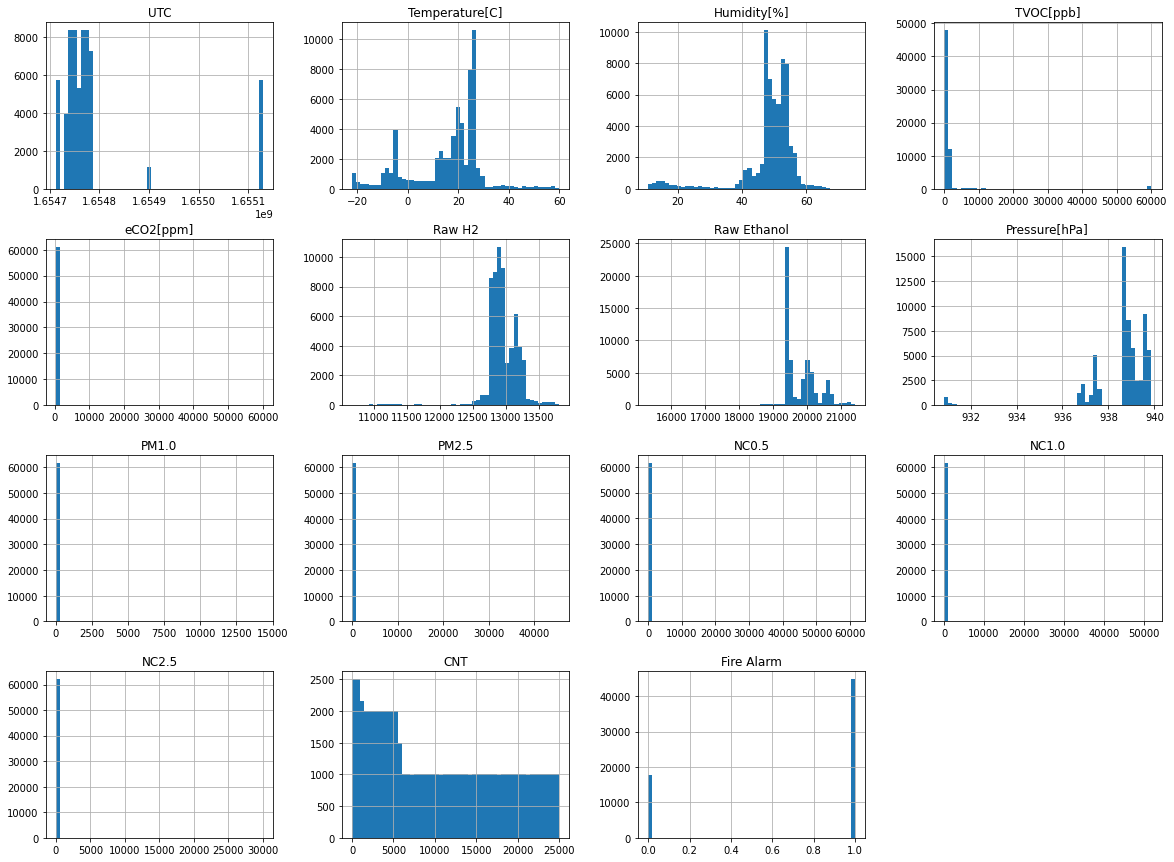

In [ ]:
smoke.hist(bins=50, figsize=(20,15))
plt.show()

Describing the features

In [ ]:
smoke.describe()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
count,6.263000e+04,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000
mean,1.654792e+09,15.970424,48.539499,1942.057528,670.021044,12942.453936,19754.257912,938.627649,100.594309,184.467770,491.463608,203.586487,80.049042,10511.386157,0.714626
std,1.100025e+05,14.359576,8.865367,7811.589055,1905.885439,272.464305,609.513156,1.331344,922.524245,1976.305615,4265.661251,2214.738556,1083.383189,7597.870997,0.451596
min,1.654712e+09,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.654743e+09,10.994250,47.530000,130.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,1.340000,8.820000,1.384000,0.033000,3625.250000,0.000000
50%,1.654762e+09,20.130000,50.150000,981.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,1.880000,12.450000,1.943000,0.044000,9336.000000,1.000000
75%,1.654778e+09,25.409500,53.240000,1189.000000,438.000000,13109.000000,20078.000000,939.418000,2.090000,2.180000,14.420000,2.249000,0.051000,17164.750000,1.000000
max,1.655130e+09,59.930000,75.200000,60000.000000,60000.000000,13803.000000,21410.000000,939.861000,14333.690000,45432.260000,61482.030000,51914.680000,30026.438000,24993.000000,1.000000


Feature Correlation

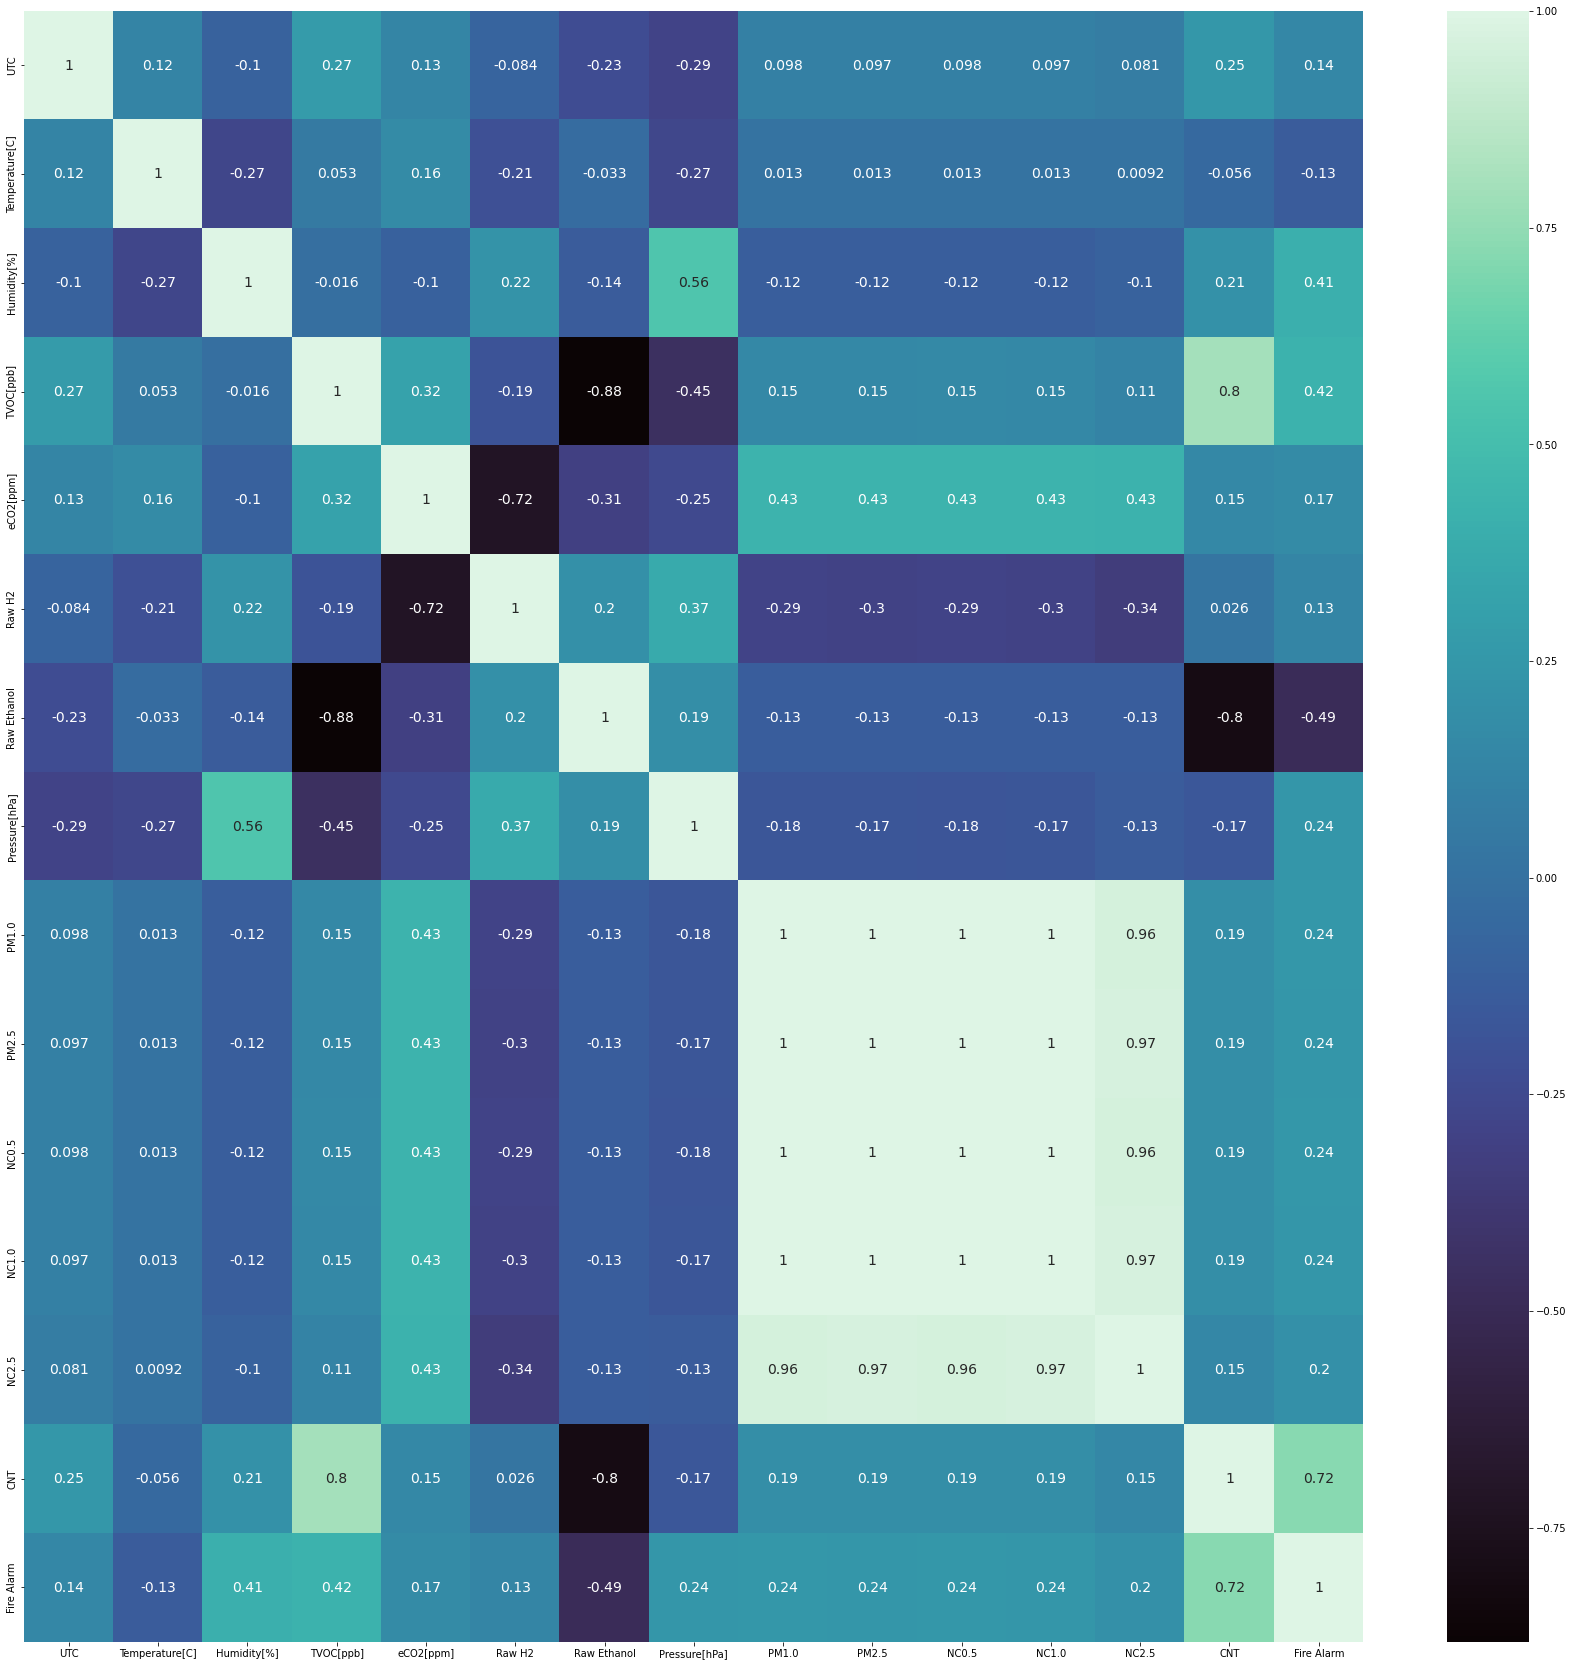

In [ ]:
corr = smoke[smoke.columns].corr(method='spearman')
plt.figure(figsize=(30, 30))
sns.heatmap(corr, annot=True, cmap="mako", annot_kws={"size":14})

Correlation between the Features and Fire Alarm

Text(0.5, 1.0, 'Correlation between features and Fire Alarm ')

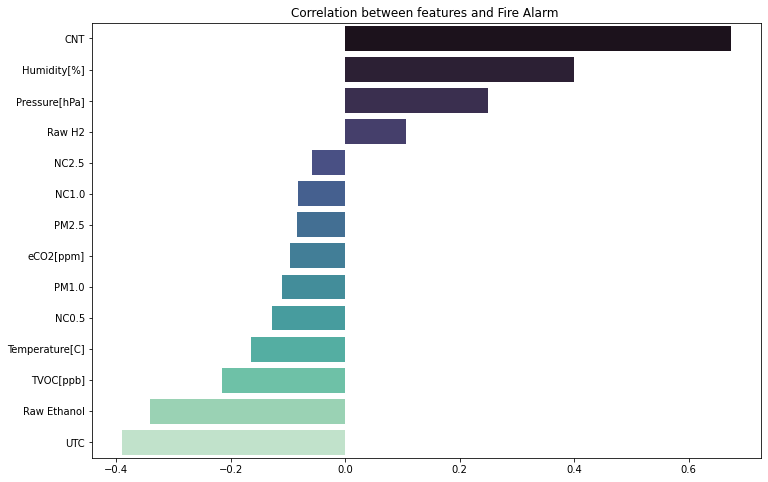

In [ ]:
plt.figure(figsize=(12,8))
data_4 = smoke.corr()["Fire Alarm"].sort_values(ascending=False)
indices = data_4.index
labels = []
corr = []
for i in range(1, len(indices)):
    labels.append(indices[i])
    corr.append(data_4[i])
sns.barplot(x=corr, y=labels, palette='mako')
plt.title('Correlation between features and Fire Alarm ')

Pearson correlation

In [ ]:
def plot_cor_matrix(corr, mask=None):
    f, ax = plt.subplots(figsize=(11, 9))
    sns.heatmap(corr, ax=ax,
                mask=mask,
                # cosmetics
                annot=True, vmin=-1, vmax=1, center=0,
                cmap='coolwarm', linewidths=2, linecolor='black', cbar_kws={'orientation': 'horizontal'})

In [ ]:
# correlation significant
def corr_sig(df=None):
    p_matrix = np.zeros(shape=(df.shape[1],df.shape[1]))
    for col in df.columns:
        for col2 in df.drop(col,axis=1).columns:
            _ , p = stats.pearsonr(df[col],df[col2])
            p_matrix[df.columns.to_list().index(col),df.columns.to_list().index(col2)] = p
    return p_matrix

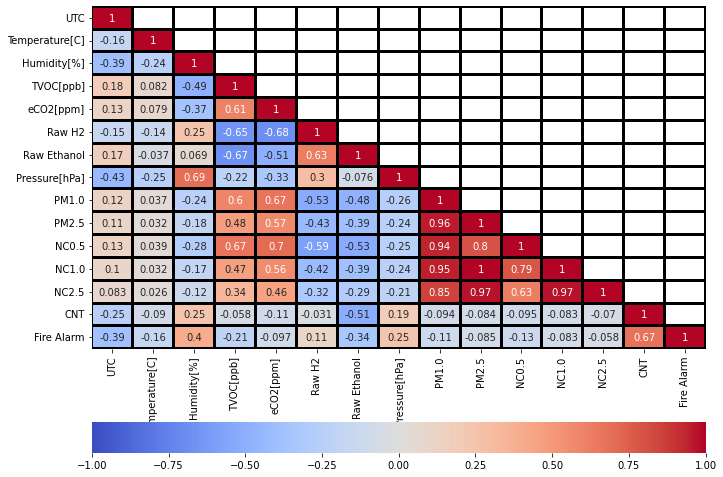

In [ ]:
from scipy import stats

corr = smoke[:-1].corr()
p_values = corr_sig(smoke)
mask = np.invert(np.tril(p_values<0.05))
plot_cor_matrix(corr,mask)

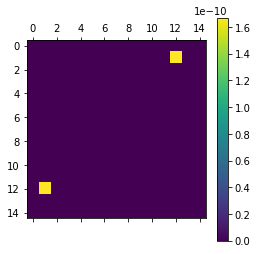

In [ ]:
plt.matshow(p_values)
plt.colorbar()

Findings: the feature NC2.5 is not significant

Number of Fire Alarm Variable

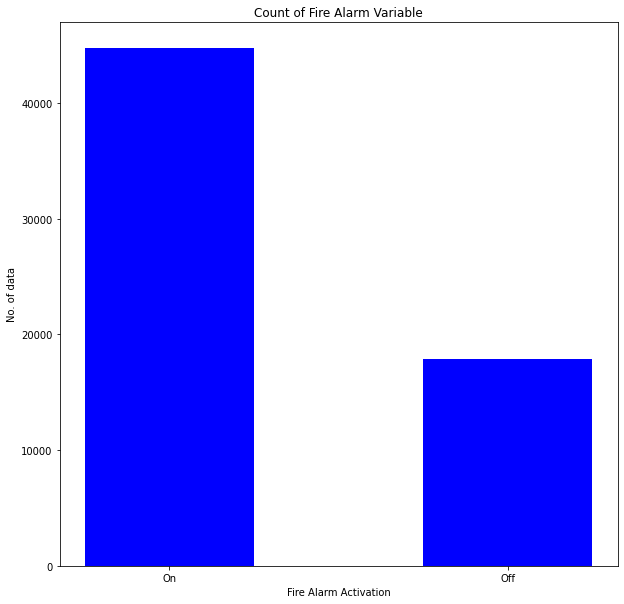

In [ ]:
plt.figure(figsize=(10,10))
on_fire = smoke[(smoke['Fire Alarm'] == 1)]
off_fire = smoke[(smoke['Fire Alarm'] == 0)]
d={
    'On':len(on_fire),
   'Off':len(off_fire),
}
plt.bar(list(d.keys()),list(d.values()),color='blue',width=0.5)
plt.xlabel("Fire Alarm Activation")
plt.ylabel("No. of data")
plt.title("Count of Fire Alarm Variable")
plt.show()

The Data is unbalanced

Findings: There is a high correlation between PM and NC data, and there are some unwanted features like CNT and UTC that has nothing to do with the data. then we will drop some unwanted data with high correlation coefficient and low pearson correlation

**Data Transformation**

Turning 0 and 1 to On and Off

In [ ]:
smoke['Fire Alarm'] = smoke['Fire Alarm'].map({0:'Off',1:'On'})
smoke['Fire Alarm'].head()

0    Off
1    Off
2    Off
3    Off
4    Off
Name: Fire Alarm, dtype: object

Dropping some features


In [ ]:
smoke = smoke.drop(['UTC', 'CNT',"PM1.0", "PM2.5", "NC2.5"],axis=1)
smoke.head()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],NC0.5,NC1.0,Fire Alarm
0,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,Off
1,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,Off
2,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,Off
3,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,Off
4,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,Off


In [ ]:
feature = ['Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]', 'Raw H2',
       'Raw Ethanol', 'Pressure[hPa]', 'NC0.5', 'NC1.0']

In [ ]:
names = ['On','Off']

Balancing the Data

In [ ]:
smoke['Fire Alarm'].value_counts()

On     44757
Off    17873
Name: Fire Alarm, dtype: int64

In [ ]:
on_fire = smoke[smoke['Fire Alarm'] == 'On']
off_fire = smoke[smoke['Fire Alarm'] == 'Off']

In [ ]:
on_fire = on_fire.sample(n=len(off_fire),random_state=101)


In [ ]:
len(on_fire)

17873

In [ ]:
len(off_fire)

17873

In [ ]:
smoke=pd.concat([on_fire,off_fire],axis=0)
smoke['Fire Alarm'].value_counts()

On     17873
Off    17873
Name: Fire Alarm, dtype: int64

Splitting the data

In [ ]:
X = smoke.drop(['Fire Alarm'],axis=1)
Y = smoke['Fire Alarm']

In [ ]:
X

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],NC0.5,NC1.0
22689,-20.442,49.42,1337,401,12972,19393,938.758,13.09,2.042
15907,12.026,49.49,1099,404,12882,19455,938.785,14.09,2.197
29412,20.400,51.29,91,400,13231,20120,939.678,14.45,2.253
31470,18.890,55.72,191,400,13150,20063,939.651,4.07,0.635
42209,24.470,53.54,1166,414,12891,19442,938.774,10.55,1.646
...,...,...,...,...,...,...,...,...,...
62625,18.438,15.79,625,400,13723,20569,936.670,4.32,0.673
62626,18.653,15.87,612,400,13731,20588,936.678,4.18,0.652
62627,18.867,15.84,627,400,13725,20582,936.687,3.95,0.617
62628,19.083,16.04,638,400,13712,20566,936.680,3.92,0.611


In [ ]:
Y

22689     On
15907     On
29412     On
31470     On
42209     On
        ... 
62625    Off
62626    Off
62627    Off
62628    Off
62629    Off
Name: Fire Alarm, Length: 35746, dtype: object

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=10)

In [ ]:
X_train

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],NC0.5,NC1.0
16779,13.561,51.89,1176,413,12885,19436,938.753,12.65,1.973
61113,19.729,34.58,11004,400,12819,19272,936.870,3.06,0.476
41,20.589,54.91,0,400,12503,19578,939.765,0.04,0.204
45929,24.430,53.67,1387,435,12935,19370,938.692,14.25,2.222
55236,31.620,56.61,3419,400,13247,19755,936.918,3.78,0.589
...,...,...,...,...,...,...,...,...,...
44752,26.900,48.01,1170,400,12929,19436,938.702,10.11,1.577
16418,12.669,51.50,1141,408,12876,19445,938.758,13.48,2.103
54899,27.260,38.82,0,400,13451,21306,937.384,14.02,2.186
56081,47.060,27.74,60000,10261,11360,16605,936.852,14813.38,2309.971


In [ ]:
y_train

16779     On
61113    Off
41       Off
45929     On
55236    Off
        ... 
44752     On
16418     On
54899    Off
56081    Off
13205     On
Name: Fire Alarm, Length: 28596, dtype: object

Scaling the data

Performing Standard Scaling on X Train set

In [ ]:
scaler = StandardScaler()
model = scaler.fit(X_train)
scaled_data = model.transform(X_train)

In [ ]:
x_train_tr = pd.DataFrame(scaled_data)

In [ ]:
x_train_tr.columns = ['Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]', 'Raw H2',
       'Raw Ethanol', 'Pressure[hPa]', 'NC0.5', 'NC1.0']

In [ ]:
x_train_tr.describe()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],NC0.5,NC1.0
count,2.859600e+04,2.859600e+04,2.859600e+04,2.859600e+04,2.859600e+04,2.859600e+04,2.859600e+04,2.859600e+04,2.859600e+04
mean,-4.969525e-18,6.614438e-16,5.714954e-18,3.261251e-17,1.960975e-15,-7.443107e-16,-8.367687e-15,-2.857477e-17,-3.727144e-19
std,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00
min,-2.652772e+00,-3.533915e+00,-2.681198e-01,-1.593459e-01,-6.822705e+00,-6.049711e+00,-5.786754e+00,-1.415882e-01,-1.146378e-01
25%,-3.356747e-01,-1.100428e-01,-2.615086e-01,-1.593459e-01,-4.031496e-01,-5.434488e-01,-7.685262e-01,-1.404444e-01,-1.142670e-01
50%,2.182398e-01,2.176707e-01,-2.417720e-01,-1.593459e-01,-3.761250e-02,9.712462e-02,2.239527e-01,-1.393212e-01,-1.139067e-01
75%,6.151624e-01,5.903837e-01,-1.545617e-01,-1.467870e-01,5.816858e-01,5.308462e-01,8.555991e-01,-1.389443e-01,-1.137850e-01
max,2.915424e+00,2.771880e+00,5.565343e+00,2.565130e+01,2.648028e+00,2.081568e+00,1.056906e+00,1.138704e+01,1.999894e+01


Performing Standard Scaling on X test set

In [ ]:
scaler = StandardScaler()
model = scaler.fit(X_test)
scaled_data = model.transform(X_test)

In [ ]:
x_test_tr = pd.DataFrame(scaled_data)

In [ ]:
x_test_tr.columns = ['Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]', 'Raw H2',
       'Raw Ethanol', 'Pressure[hPa]', 'NC0.5', 'NC1.0']

In [ ]:
x_test_tr.describe()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],NC0.5,NC1.0
count,7.150000e+03,7.150000e+03,7.150000e+03,7.150000e+03,7.150000e+03,7.150000e+03,7.150000e+03,7.150000e+03,7.150000e+03
mean,2.683168e-17,-3.011111e-16,-1.142831e-17,-1.490649e-17,-2.135603e-15,1.263077e-15,-7.035367e-14,-5.962596e-18,7.453245e-18
std,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00
min,-2.688526e+00,-3.545705e+00,-2.633528e-01,-1.581600e-01,-6.988266e+00,-6.194574e+00,-5.748914e+00,-1.381592e-01,-1.121779e-01
25%,-3.370669e-01,-1.017272e-01,-2.567489e-01,-1.581600e-01,-4.310327e-01,-5.661800e-01,-7.727029e-01,-1.369621e-01,-1.117557e-01
50%,2.128083e-01,2.090427e-01,-2.375288e-01,-1.581600e-01,-5.492441e-02,9.442003e-02,2.171075e-01,-1.357875e-01,-1.113494e-01
75%,6.185988e-01,5.904533e-01,-1.487216e-01,-1.441369e-01,5.832266e-01,5.164132e-01,8.425288e-01,-1.353834e-01,-1.112090e-01
max,2.948746e+00,2.694221e+00,5.650552e+00,1.874306e+01,2.670320e+00,2.084401e+00,1.033399e+00,1.192254e+01,2.180075e+01


**Modelling**

Choosing the model

In [ ]:
model = DecisionTreeClassifier(max_depth=3,min_samples_leaf=12)

Training

In [ ]:
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=12)

Evaluate the model

In [ ]:
pred = model.predict(X_test)

Accuracy

In [ ]:
accuracy_score(y_test,pred)*100

99.04895104895105

Confusion matrix

Text(0.5, 1.0, 'Confusion Matrix')

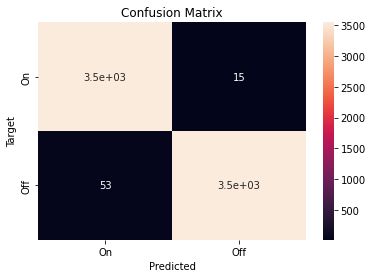

In [ ]:
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True, xticklabels=['On','Off'], yticklabels=['On','Off'])
plt.xlabel('Predicted')
plt.ylabel('Target')
plt.title('Confusion Matrix')

Tree Graph

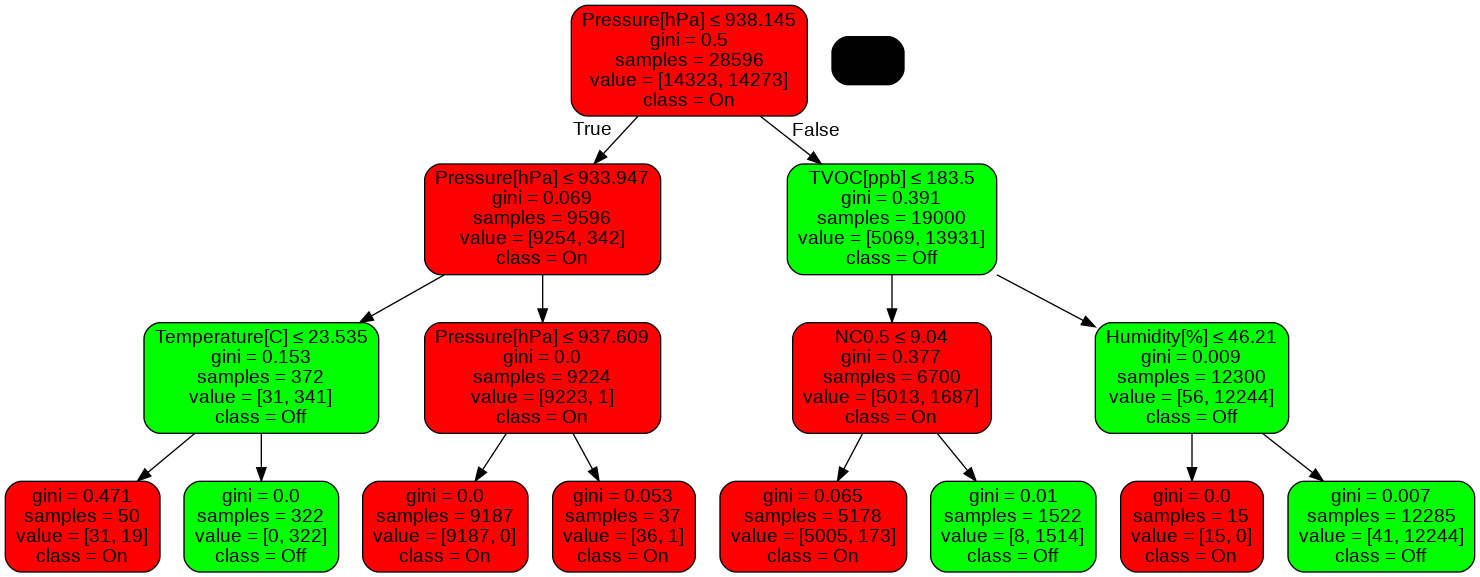

In [ ]:
dot_data = tree.export_graphviz(model, out_file=None, 
                                feature_names=feature,  
                                class_names=names,  
                                filled=True, rounded=True,  
                                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)

colors = ('red', 'green')
nodes = graph.get_node_list()

for node in nodes:
  if node.get_label():
    values = [int(ii) for ii in node.get_label().split('value = [')[1].split(']')[0].split(',')]
    color = '#{:02x}{:02x}'.format(values[0], values[1])
    node.set_fillcolor(colors[np.argmax(values)])

graph.write_png('colored_tree.png')



def viewPydot(pdot):
    plt = Image(pdot.create_png())
    display(plt)

viewPydot(graph)

In [ ]:
def plot_feature_importances(clf, feature_names):
    c_features = len(feature_names)
    plt.barh(range(c_features), clf.feature_importances_)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature name")
    plt.yticks(np.arange(c_features), feature_names)

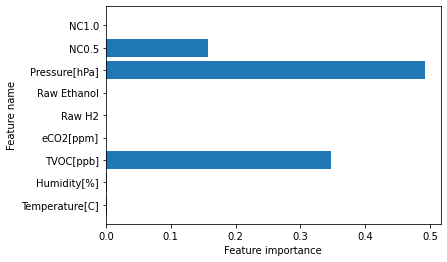

In [ ]:
plot_feature_importances(model, feature)